# **Facebook Data Analysis Final Report** 

# Introduction

Social media has become increasingly influential in everyday lives. As such, users are focusing on continuously improving their digital branding. Facebook, a popular social media platform, is a platform where users post media to promote their brand and products. We’re wondering if there are times of the week that attract higher post interactions (the sum of likes, comments, and shares). This is a good candidate for data analysis, because knowing the best time to post would help users maximize their digital footprint.

To determine the best hour in the week to post content, we asked the question:
**What are the best hours of the week to post on Facebook for maximum post interactions?** 

We chose to use hour of the week as a predictor because it provides more granularity in our analysis (it considers both time of day and weekday) than if we only considered hour of day. Moreover, we chose one predictor and one target variable only, because we are only concerned with the overall total number of interactions and we wanted to make the analysis simple to understand (3-D vs 2-D graphs) for our readers. 

The data that will be used to answer this question is retrieved from a dataset published in 2014 on a renowned cosmetics brand’s Facebook page, which focuses on posts geared toward consumer interaction. It has columns that feature the lifetime number of visits on the post (total impressions and reach), as well as the number of people who have liked and engaged on the post (lifetime people who have liked and engaged on your post). 

To answer our question, we will use the columns “Total Interactions”, “Post Hour”, and “Post Day”. “Total Interactions” is what we are predicting, while “Post Hour” and “Post Day” will be mutated in a new variable called “hour_of_week” to be used as our predictor. “Hour_of_week” has a range of 0 to 167 (168 hours in a week) starting from Sunday at midnight and ending on Saturday at 11:59 p.m.


# Methods & Results 

## Loading in Libraries & Reading in Data

Before we begin coding, we must load the required libaries for R.

In [26]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(digest)
library(repr)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

Next, we will download the file to JupyterHub from an outside source. This dataset uses semi-colons as it's delimiter, so instead of normally reading the file through "read_csv", we will read the file through "read_csv2".

In [27]:
#reading the data
downloaded_file <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip", downloaded_file)

#Reading the data in R
facebook <- read_csv2(unz(downloaded_file, "dataset_Facebook.csv"))
head(facebook)
unlink(downloaded_file)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


Table 1: Initial Facebook Dataset

Looking at our dataset, it passes the test for tidy data, so no further cleaning of the dataset is required. However, the variable names are separated by spaces instead of underscores. To deal with this issue, we'll rename our selected variables to avoid additional headaches along the way. And as stated in our introduction, we will also be creating a new variable for the hour of the week through the mutate function.

In [28]:
#Renaming "Post Hour"
facebook_1 <- facebook %>% rename(post_hour = `Post Hour`) %>% 
    rename(post_day = `Post Weekday`) %>% 
    rename(total_interactions = `Total Interactions`) %>%
    mutate(hour_of_week = (post_day - 1) * 24 + post_hour)

## Exploratory Data Analysis

As part of our exploratory data analysis, we'll take a quick overview of our predictor and target variable by plotting "total_interactions" against "hour_of_week" by using a scatterplot, as we want to compare the relationship between the two quantitative variables. Note that we used "hour_of_week" instead of "post_hour" because it's more comprehensible to read. It's also the same data represented in a different manner.

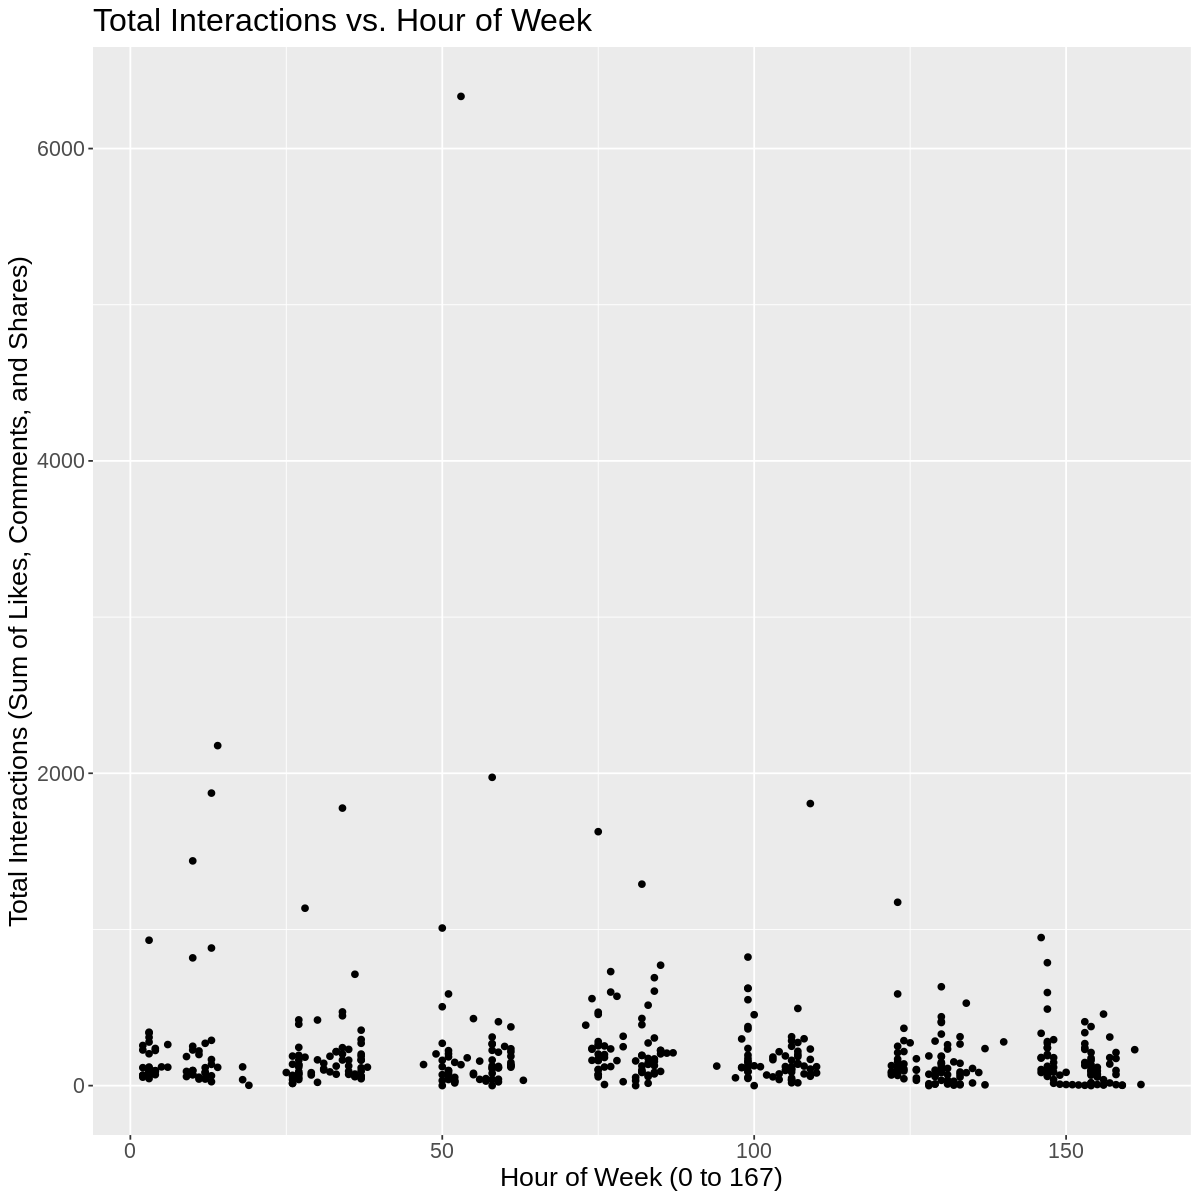

In [53]:
options(repr.plot.width = 10, repr.plot.height = 10)
exploratory_scatter_plot <- ggplot(facebook_1, aes(x = hour_of_week, y = total_interactions)) +
                            geom_point() +
                            labs(x = "Hour of Week (0 to 167)", y = "Total Interactions (Sum of Likes, Comments, and Shares)", title = "Total Interactions vs. Hour of Week") +
                            theme(text = element_text(size = 16)) 
exploratory_scatter_plot

Figure 1: Exploratory Scatter Plot between Hour of Week and Total Interactions

Hmmm. It seems here that there is one post that has more than six thousand total interactions, with only around twelve posts that have more than a thousand total interactions. These outliers can cause implications as it can skew the results of our data (large standard deviations) and make our graph take up unnecessary space, like in the example above. Therefore, let's filter our total interactions to be less than a thousand to retrieve the most optimal results when we perform our regression models. 

In [54]:
set.seed(2021)
facebook_filtered_interactions <- facebook_1 %>% filter(total_interactions < 1000)

Next, let's build a summary of our dataset, which includes the number of rows, number of columns, the number of observations with missing data values, and the means of our selected variables. However, to find the means to our variables, we will also need to filter out the number of rows with missing data values, so that we would not encounter any problems (such as "NA" result) when finding the average. Altogether, we will mutate each of the results we found into one big table in the end.

In [55]:
set.seed(2021)
#Filtering missing data
facebook_filtered_na <- facebook_filtered_interactions %>%
                            filter(!is.na(Paid)) %>% 
                            filter(!is.na(comment)) %>% 
                            filter(!is.na(like)) %>% 
                            filter(!is.na(share)) %>%                          
                            filter(!is.na(total_interactions))

#Missing Rows of Data
missing_rows <- sum(rowSums(is.na(facebook)))

#Average of Each Predictor Variable
average_likes <- mean(facebook_filtered_na[["like"]])
average_comments <- mean(facebook_filtered_na[["comment"]])
average_shares <- mean(facebook_filtered_na[["share"]])
average_total_interactions <- mean(facebook_filtered_na[["total_interactions"]])

#Total Number of Observations
observation_total <- nrow(facebook_filtered_na)

#Total Number of Variables
variable_total <- ncol(facebook_filtered_na)

#Exploratory Data Analysis Table
exploratory_table <- facebook_filtered_na %>%
                     mutate(facebook_filtered_na, observation_total = observation_total) %>%
                     mutate(facebook_filtered_na, variable_total = variable_total) %>%
                     mutate(facebook_filtered_na, average_likes = average_likes) %>%
                     mutate(facebook_filtered_na, average_comments = average_comments) %>%
                     mutate(facebook_filtered_na, average_shares = average_shares) %>%
                     mutate(facebook_filtered_na, average_total_interactions = average_total_interactions) %>%
                     mutate(facebook_filtered_na, missing_rows = missing_rows) %>%
                     select(observation_total, variable_total, average_likes, average_comments, average_shares, average_total_interactions,
                            missing_rows) %>%
                     slice(1)
exploratory_table

observation_total,variable_total,average_likes,average_comments,average_shares,average_total_interactions,missing_rows
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
483,20,141.2733,5.621118,23.49689,170.3913,6


Table 2: Exploratory Summary Table

Based on these results, we can notice a few things. First, there are 483 observations, meaning that theres a lot of data to process! This means that regardless of the amount of folds specified for cross validation, our accuracy of our regression model won't be perfect. Our results will only provide a rough estimate of the true results, which will be sufficient enough for answering our question. The significance of this table (more specifically average_total_interactions) is to serve as a reference for the results later, when we compare with our data visualization.

Next, let's create a quick visualization of our dataset of our predictor and target variables (total interactions and hour of week) through the function ggpairs. 

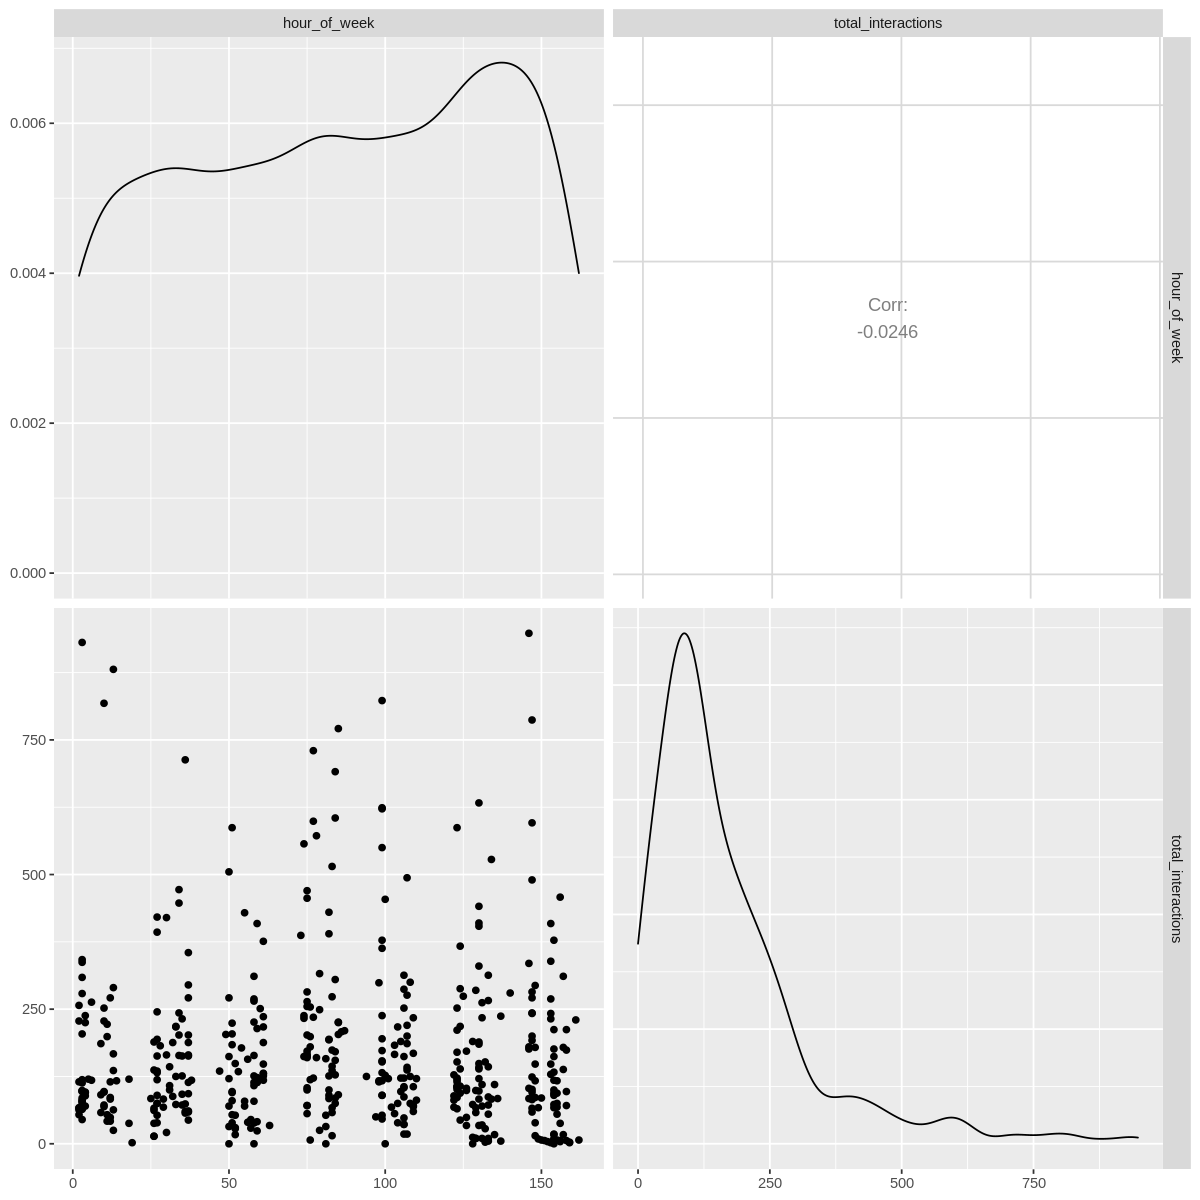

In [58]:
options(repr.plot.width = 10, repr.plot.height = 10)
facebook_ggpairs2 <- facebook_filtered_interactions %>%
    select(hour_of_week, total_interactions) %>% 
    ggpairs()  
facebook_ggpairs2

Figure  2: GGpairs between Hour of Week and Total Interactions  

Looking at the relationship between Hour of Week and Total Interactions, there seems to have no correlation between the two variables. This means as that as the week progresses, this does not affect the number of total interactions. While this may serve as an initial indicator for poor results, it's better if we perform the data analysis to see if this is true.

## Regression

As we are clearly predicting a numerical value, this is a regression problem, predicting the highest total interactions based on the hour of the week. As with any regression model at the start, we'll split the data into training and testing data, setting aside 75 percent for training and 25 percent for testing, setting our strata to be total interactions.

In [33]:
#Split into training (75 percent of data set) and test data
set.seed(2021)
facebook_split <- initial_split(facebook_filtered_na, prop = 0.75, strata = total_interactions)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

### K-Nearest Neighbors

First we'll build a recipe and model specification, and then scale our predictors for our recipe. We'll set the neighbors to "tune" in our nearest_neighbor function to find the most optimal K and mode to "regression" for our model specification. 

In [59]:
set.seed(2021)
#Recipe for Post Hour
facebook_recipe <- recipe(total_interactions ~ hour_of_week, data = facebook_train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())
#Model
facebook_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")

Next, we'll set cross-validation for five folds, and begin creating our workflow by adding our recipe and model. We also want to test 200 values of K by creating a tibble containing a sequence of 200 rows of K. Finally, we'll tune our workflow with the 200 values of K from gridivals, and make sure it resamples in our cross-validation data set, which will help us find our RMSE. Lastly, we'll filter for the minimum RMSE value to find our most optimal K.

In [64]:
set.seed(2021)
#5 fold cross validation
facebook_vfold <- vfold_cv(facebook_train, v = 5, strata = total_interactions)

#workflow
facebook_workflow <- workflow() %>%
                     add_recipe(facebook_recipe) %>%
                     add_model(facebook_spec)

#testing 200 values to find the best value for K
gridvals <- tibble(neighbors = seq(1, 200))

#tuning workflow and resampling cross validation data set
facebook_min_rmse <- facebook_workflow %>%
                        tune_grid(resamples = facebook_vfold, grid = gridvals) %>%
                        collect_metrics() %>%
                         filter(.metric == "rmse") %>%
                        arrange(mean)  %>% 
                        slice(1)
facebook_min_rmse

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
93,rmse,standard,161.1096,5,5.728928,Model093


Table 3: Optimal K

Here we can see that with our minimum RMSE, our optimal K is 93. And with our most optimal K, we will repeat the steps earlier: using the k_min as our nearest neigbour, refitting our knn regression model, and predicting the model using test data instead of training data.

In [37]:
#Min RMSE
set.seed(2021)
k_min <- facebook_min_rmse %>%
            pull(neighbors)

#Using the best K in our model
facebook_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
                            set_engine("kknn") %>%
                            set_mode("regression")

#Reworking the workflow to incorporate our chosen K
facebook_best_fit <- workflow() %>%
                        add_recipe(facebook_recipe) %>%
                        add_model(facebook_best_spec) %>%
                        fit(data = facebook_train)

#Summary of the training vs testing data
facebook_summary <- facebook_best_fit %>% 
                       predict(facebook_test) %>%
                       bind_cols(facebook_test) %>%
                       metrics(truth = total_interactions, estimate = .pred)  
facebook_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,134.92938185
rsq,standard,0.04724075
mae,standard,105.24731183


Table 4: RMSPE value from cross-validation of the best mode

The $RMSPE$ value is from our testing data set is 134.92, which is lower than 161.11, the $RMSPE$ value for the cross-validation of our best mode. This means that our model is better on the test data than on the training data.

#### Visualization of KNN Regression Model

Finally, let's predict our values through the test set and plot our predicted values in a line against our predicted and target variables.

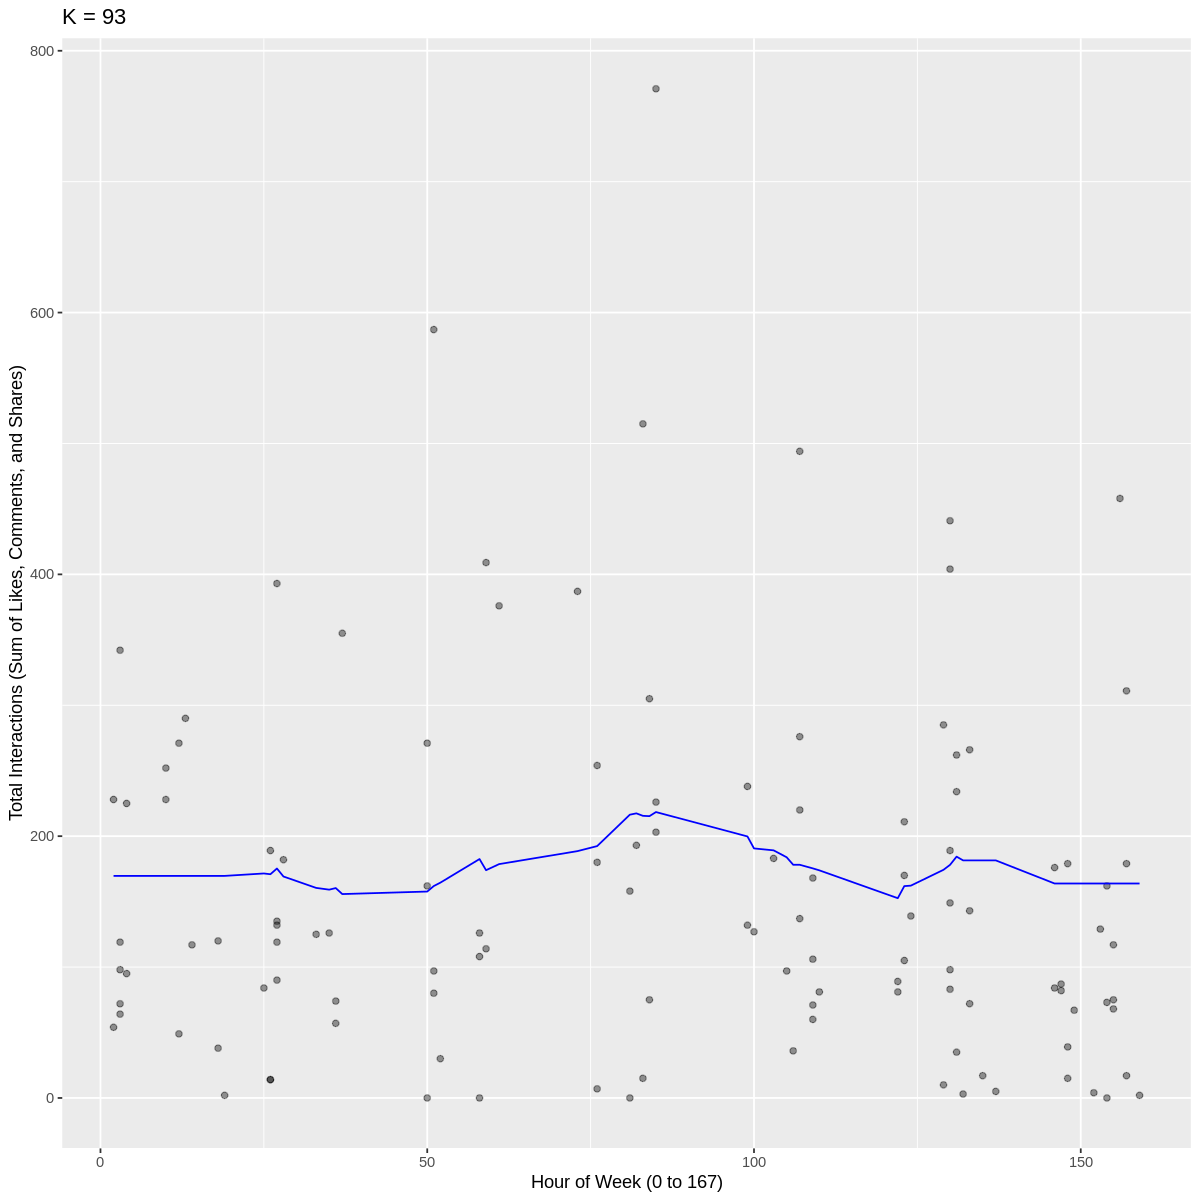

In [66]:
facebook_preds <-  facebook_best_fit %>%
                   predict(facebook_test) %>%
                   bind_cols(facebook_test)
facebook_plot_final <- ggplot(facebook_preds, aes(x = hour_of_week, y = total_interactions)) +
                       geom_point(alpha = 0.4) +
                       xlab("Hour of Week (0 to 167)") +
                       ylab("Total Interactions (Sum of Likes, Comments, and Shares)") +
                       geom_line(data = facebook_preds, aes(x = hour_of_week, y = .pred), color = "blue") +
                       ggtitle(paste0("K = ", k_min))
facebook_plot_final

Figure 3: Plotting Model Predictions onto the Testing Dataset

We notice that from the predicted line, the highest number of interactions roughly occur in the middle of the week, Wednesday, while the lowest interactions occur somewhere in the realm of Friday to Saturday, which is surprising, considering we would expect social media usage at it's peak during the weekends. 

Finally we will use facebook_preds to see which hour of the week has the highest predicted interactions. We created a function that converts the post_day from a numerical value to characters so that it is easier to see exactly which day and hour has the highest predicted interactions.

In [68]:
#function that converts post_day (weekday as a number from 1 to 7) to name of day
weekday_no_to_name <- function(day_num) {
    day <- switch(day_num, "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
    return(day)
}

In [69]:
# Show post hours, weekdays with highest post stats
facebook_best <- facebook_preds %>% 
    select(.pred, post_day, post_hour, hour_of_week) %>%
    group_by(hour_of_week, post_day, post_hour) %>%
    summarize(predicted_interactions = mean(.pred)) %>% # same hour and weekday have same prediction; used summarize to remove duplicates
    mutate(post_day = map(post_day, weekday_no_to_name)) %>% # convert weekday numbers to weekday names
    arrange(desc(predicted_interactions))
head(facebook_best)

`summarise()` regrouping output by 'hour_of_week', 'post_day' (override with `.groups` argument)



hour_of_week,post_day,post_hour,predicted_interactions
<dbl>,<list>,<dbl>,<dbl>
85,Wednesday,13,218.4086
82,Wednesday,10,217.4194
81,Wednesday,9,216.3978
83,Wednesday,11,215.5376
84,Wednesday,12,215.2796
99,Thursday,3,199.7742


Table 5: Best 6 times to post based on KNN regression model

Our initial inquiries seem accurate! It seems like the best times to post are roughly between Wednesday morning to afternoon, with the best hour occurring at 1:00 PM at a predicted 218 interactions.

### Linear Regression

KNN Regression isn't the only method for predicting numerical values. Another method is Linear Regression, which instead of looking at the K-nearest neighbours and averaging over their values for a prediction, we use all the training data points to create a straight line of best fit. This different prediction method may give us more accurate results, so we will be creating a linear regression model for further analysis and comparison to our KNN regression model later on in the report.

Using our training data from before, we start by creating a new model specification that sets the engine to "lm" and the mode to "regression", and creating a new recipe. 

In [41]:
fb_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

fb_recipe <- recipe(total_interactions ~ hour_of_week, data = facebook_train)

fb_fit <- workflow() %>%
    add_recipe(fb_recipe) %>%
    add_model(fb_spec) %>%
    fit(data = facebook_train)
fb_fit

facebook_linear_preds <- fb_fit %>%
                   predict(facebook_test) %>%
                   bind_cols(facebook_test)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  hour_of_week  
   175.02958      -0.00181  


From the given model, we see that our coefficients are (intercept) β0 = 175.02958, and (slope) β1 = -0.00181. This gives us a slope equation of:

$ total \ interactions = 175.02958 - 0.00181 * hour \ of \ week$

The model is predicting that interactions roughly start at 180.85, and every hour_of_week decreases total interactions by 0.00181. This fits our exploratory analysis earlier, where we initially discovered that there is no correlation between hour_of_week and total interactions.

Next, we calculate the $RMSE$  to assess goodness of fit on fb_fit. This tells us how well our linear regression model predicts on the training data used to fit the model.

In [42]:
lm_rmse <- fb_fit %>%
         predict(facebook_train) %>%
         bind_cols(facebook_train) %>%
         metrics(truth = total_interactions, estimate = .pred) %>%
         filter(.metric == "rmse") %>%
         select(.estimate)  %>%
         pull()
lm_rmse

[1] 162.5757

We also calculate the $RMSPE$ using our testing data.

In [43]:
fb_test_results <- fb_fit %>%
    predict(facebook_test) %>%
    bind_cols(facebook_test) %>%
    metrics(truth = total_interactions, estimate = .pred) %>%
         filter(.metric == "rmse") %>%
         select(.estimate)  %>%
         pull()

fb_test_results

[1] 137.321

The $RMSPE$ value from our testing data set is 137.32, which is lower than 162.58, the $RMSE$ value. This means that our model is better on the test data than on the training data.
<br> <br>
The next and final step is to graph the relationship.

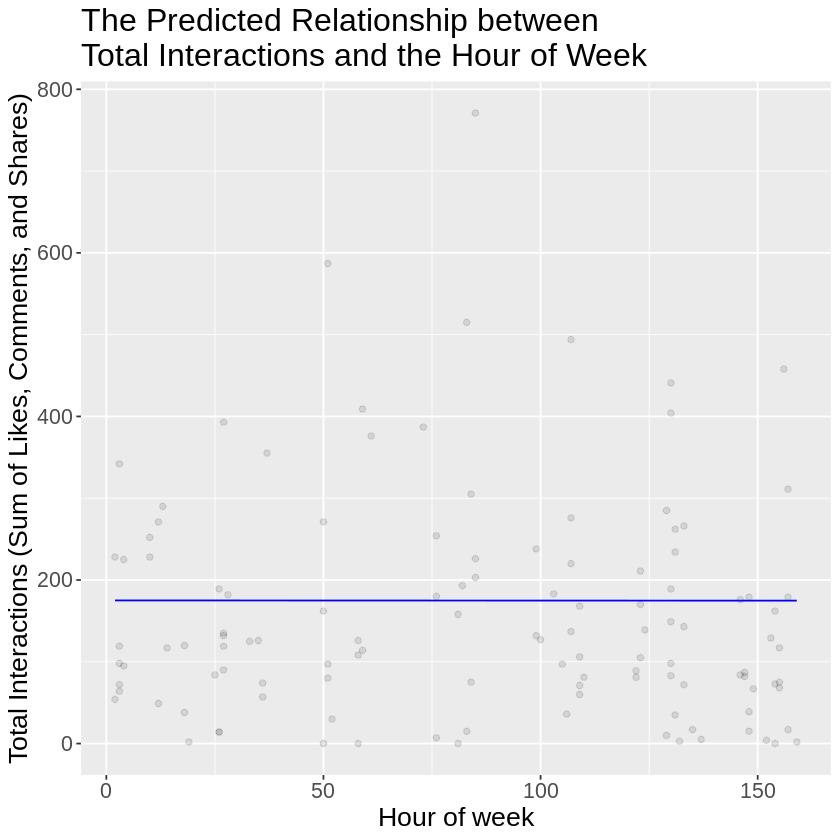

In [44]:
facebook_plot_final <- ggplot(facebook_linear_preds, aes(x = hour_of_week, y = total_interactions)) +
                       geom_point(alpha = 0.1) +
                       xlab("Hour of week") +
                       ylab("Total Interactions (Sum of Likes, Comments, and Shares)") +
                       geom_line(data = facebook_linear_preds, aes(x = hour_of_week, y = .pred), color = "blue") +
                       ggtitle("The Predicted Relationship between 
Total Interactions and the Hour of Week") +
                       theme(text = element_text(size = 16)) 
facebook_plot_final

Figure 4: Graph of Total Interactions vs Hour of Week using Linear Regression

The visualization of the model affirms what our model was predicting earlier; the correlation between Total Interactions and Hour of Week is minimal. The slope of the line is nearly zero, indicating that the relationship is very weak, but it is still a weak negative slope. This does show that there is a relationship between the two variables, but this relationship serves no purpose for predictive analysis.

Finally we will use facebook_linear_preds to see which hour of the week has the highest predicted interactions.

In [45]:
facebook_best <- facebook_linear_preds %>% 
    select(.pred, post_day, post_hour, hour_of_week) %>%
    group_by(hour_of_week, post_day, post_hour) %>%
    summarize(predicted_interactions = mean(.pred)) %>% # same hour and weekday have same prediction; used summarize to remove duplicates
    mutate(post_day = map(post_day, weekday_no_to_name)) %>% # convert weekday numbers to weekday names
    arrange(desc(predicted_interactions))
head(facebook_best)

`summarise()` regrouping output by 'hour_of_week', 'post_day' (override with `.groups` argument)



hour_of_week,post_day,post_hour,predicted_interactions
<dbl>,<list>,<dbl>,<dbl>
2,Sunday,2,175.0260
3,Sunday,3,175.0242
4,Sunday,4,175.0223
10,Sunday,10,175.0115
12,Sunday,12,175.0079
13,Sunday,13,175.0061


Table 6: Best 6 times to post based on Linear Regression Model

According to Table 6, the best times to post is on Sunday. This finishes our data analysis, and now we will interpret these results found from our KNN Regression and Linear Regression Models in the discussion section of the report.

# Discussion

To summarize, both KNN regression and linear regression indicated that there is little correlation between the hour of week and the total number of interactions. However, upon further examination of the regression models, we can spot some observations that can help answer our question.

Looking at Figure 3, we notice that the regression line has a slight peak in the middle of the graph. This corresponds to the results in Table 5, which indicate that the five highest interactions occur on Wednesday from 09:00 to 13:00. Table 5 also indicates the highest predicted interactions to be 218.41 which is much higher than 170.39 from Table 2.

On the other hand, the regression line in Figure 4 looks constant. In fact, the slope of the regression line is -0.00181, which is incredibly small. The negative slope indicates that generally posts have higher interactions at the beginning of the week (Sunday) than at the end of the week (Saturday). Table 6 confirms this as it indicates that the 6 highest predicted interactions occur on Sunday. Table 6 also indicates the highest predicted interactions to be 175.03 which is slightly higher than 170.39, the average interaction (Table 2), and quite lower than the highest predicted interactions using KNN regression.

Comparing the RMSPE values for both regression models can give us a clearer picture of the accuracy of our models. The RMSPE value for KNN regression is 134.92, while for linear regression it’s 137.32. Since the RMSPE is lower for KNN regression than linear regression, our KNN regression model provided a slightly better fit on test data than our linear regression model. Using KNN regression also makes more sense in the context of our question because it is more likely that there are peaks where posts have higher interactions throughout the week compared to a straight slope where post interactions only increases or decreases throughout the week. KNN regression allows for such peaks to exist, while linear regression does not. 

Given that the RMSPE value for KNN regression is smaller, and the fact that KNN regression allows for peaks to exist, we can conclude that, although the correlation is very weak, posting between 09:00 and 13:00 on Wednesdays is likely to result in the highest post interactions for this specific cosmetic brand. 

### Expectations

Our results were not what we expected. We expected that there would be a relationship between the time of a post and the number of interactions a post has. Specifically, we expected to find that a post on the weekends or evenings would garner more interactions than during the weekdays because weekends and evenings are leisure time for many people. Moreover, we expected that there would be a stronger correlation between post hour and total interactions. 

### Impact

An article by Sprout Social found that the best times to post for highest global engagement on Facebook is Wednesdays, 11 a.m. and 1–2 p.m, and the worst time to post is on Sundays. A different article by Buffer states that “the best time to post to Facebook is between 1 p.m. – 3 p.m. on during the week and Saturdays.”

Our study and the studies conducted by Sprout Social and Buffer give different results for when the best time to post on Facebook. This may be because the target audience of the single brand in our dataset is different from that of a tech company or even other cosmetic brands. This also suggests that there is no universal best time to post. The best time to post may depend on various factors beyond the scope of our project, such as the type of post, whether posts are paid, or posts made by others.

Our findings can be useful to the cosmetic brand to maximize their post engagement and boost their profits. Moreover, our methods could be useful for all companies when assessing their own post engagement. 

### Future Questions

From here, there are many future questions that could be asked. These include:
- Is it true for other social media platforms or just Facebook? 
- Is there a large difference between post interactions on a paid post versus a normal post?

# References

Literature 1 (Dataset): 

Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand 
building: A data mining approach. Journal of Business Research, 69(9), 3341-3351. https://doi.org/10.1016/j.jbusres.2016.02.010.

Literature 2:

Read, A. (2021, January 6). Best time to post on Facebook in 2021: A complete guide. Buffer. https://buffer.com/library/best-time-to-post-on-facebook/

Literature 3:

Arens, E. (2020, August 3). The best times to post on social media in 2020. Sprout Social. https://sproutsocial.com/insights/best-times-to-post-on-social-media/